# Tutorial for data plotting in Julia

We use the package `Plots`.

In [1]:
using Plots

## Example 1 - Plotting basic functions

In this example, we show how to plot $\sin(x)$ with the command `plot`.

* Firstly, we input sin into the first block.
* Secondly, we set the range from $-2\pi$ to $\pi$. 
* Thirdly, we label the image as "sine function".

**Remark:** All the basic functions such as $e^x$ and $\arcsin(x)$ can be done in the same way.

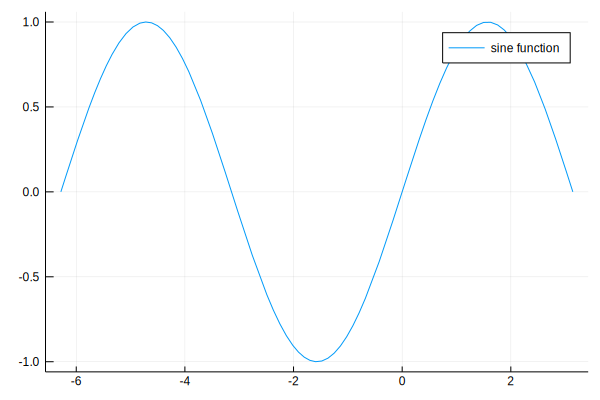

In [2]:
plot(sin, -2pi, pi, label="sine function")

## Example 2

In this example, we show how to plot three-dimensional graphics. We aim to plot the following 3-D parametric curve:
$$
x(t) = t\cos(t), \quad y(t) = t\sin(t), \quad z(t) = t, \quad t=[0, 8\pi],
$$
that represents a spiral with radius ranging from $0$ to $8\pi$.

We split the domain $t$ into $N+1$ points and then connect all the data points using command `plot`. The procedure is the following:
* Firstly, we set $N=200$. so the length of each subinterval $d = 8\pi/N$ and the labels $n=[0,1,2,\ldots,200]$ is an $201\times 1$ array.
    * The discrete points of the domain, denited by ti, are $ti = d*n$ that is an $(N+1)\times 1$ array.
* Secondly, $x$ is $ti \times \cos(ti)$, similar procedure cna be performed for $y$ and $z$.
* At last, we use marker to set the style of the points in the image, and legend=false means that we don't want to label the grapic.

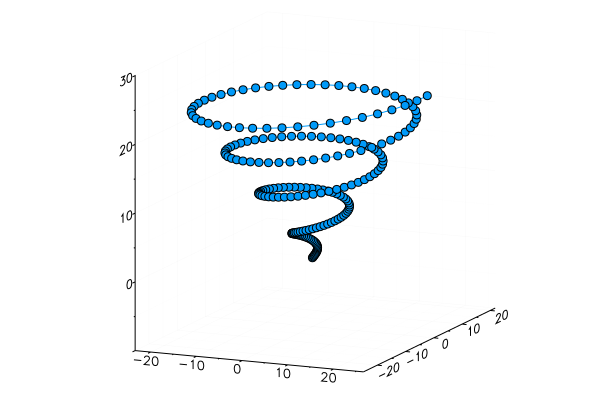

In [18]:
N = 200; d = 8*pi/N;
n= 0.0:N;
ti = [d*n for n in 0:N];
x= ti.*cos.(ti); 
y= ti.*sin.(ti);
z= ti;
plot(x, y, z, marker=:circle, legend=false)

We can also use the command `plotd3d`.
* We set the linewidth (lw) equals to 2 and legend (leg) set to false indicating no labeling.

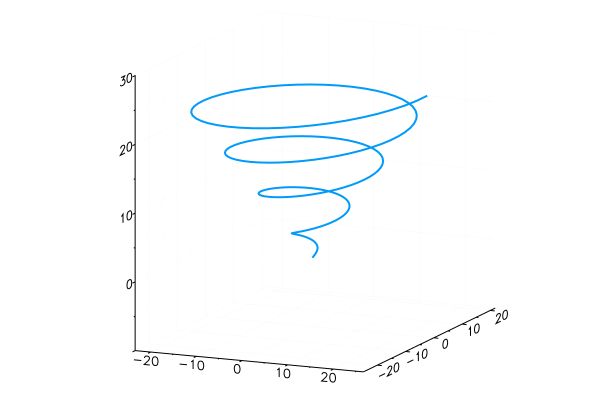

In [20]:
plot3d(x,y,z,lw=2,leg=false)

## Example 3

In this example, we will show how to add a graphic to an already drawn graphic.
* First, we set x to be intergers from 1 to 10, and y to be ten random numbers between 0 and 1, then we plot the image.
* Second, we set z to be random numbers between 0 and 1.
* Last, we overlap the second function graphic with the first graphic.

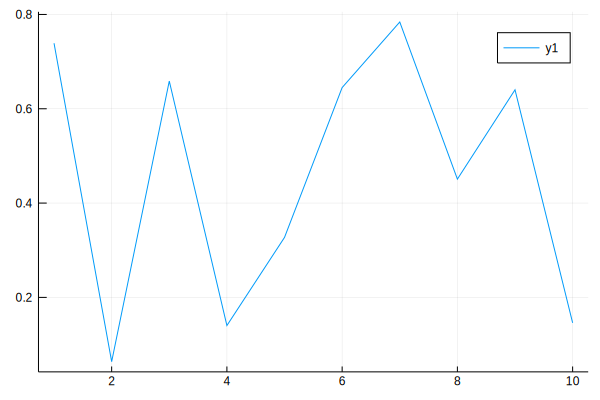

In [5]:
x = 1:10; y = rand(10);
plot(x,y)

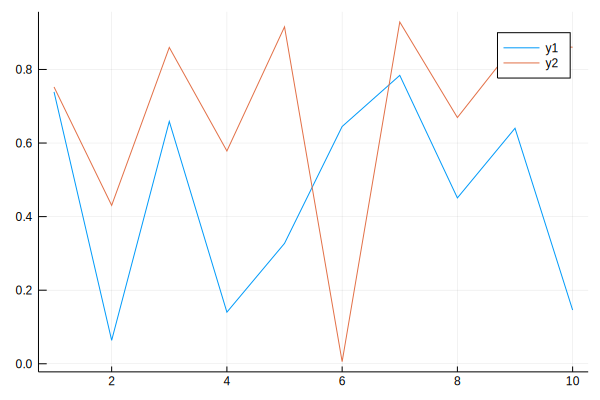

In [6]:
z = rand(10)
plot!(x,z)

## Example 4

In this example, we will show how to plot two graphic at the same time.
* First, we set x to be the intergers from 1 to 10, and y to be a 10*2 matrix, and first column represents first function value, second column represents second function value.
* Second, we plot the graphic,and set the title and label function's name, lw=3 represents the Width of line is three.
* Third, xlabel!("My x label") means that the label of x-axis is "My x label"

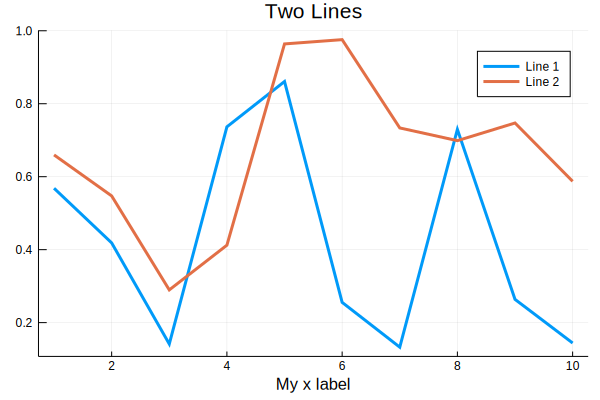

In [7]:
x = 1:10; y = rand(10,2);
plot(x,y,title="Two Lines",label=["Line 1" "Line 2"],lw=3)
xlabel!("My x label")

## Example 5

In this example, we will show how to plot three function graph.
* First, we set x to be the intergers from 1 to 10, and y to be a 10*2 matrix, and first column represents first function value, second column represents second function value.
* Second, we plot the graphic.
* Third, we set z to be 10 random numbers between 0 and 1.
* Last, we overlap the second function graphic with the first graphic.

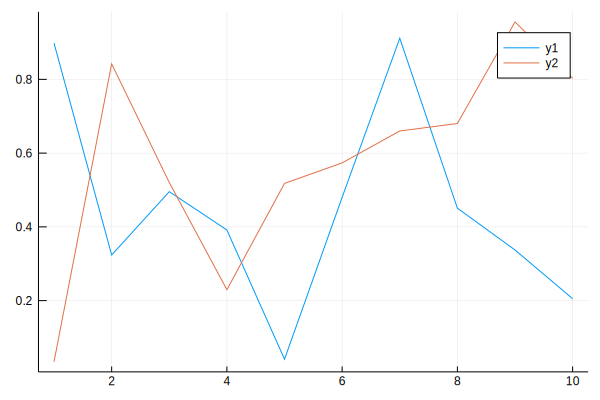

In [8]:
x = 1:10; y = rand(10,2);
p = plot(x,y)

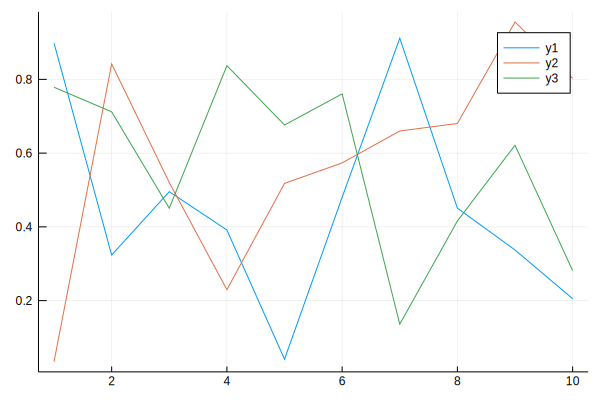

In [9]:
z = rand(10)
plot!(p,x,z)

## Surface

* First, we set the range of x and y
* Second, we set the function "h"
* Last, we plot the surface of the function from "surface(x,y,h)".

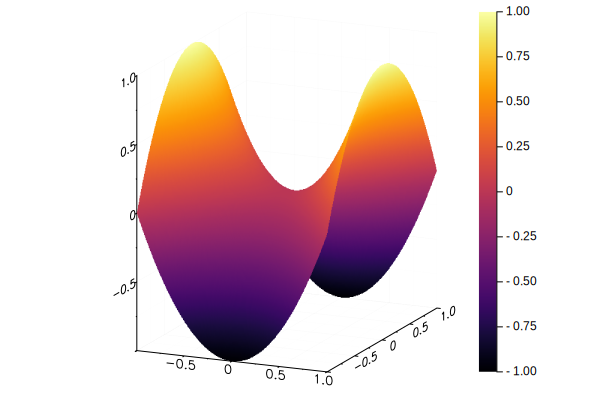

In [10]:
x=-1:0.01:1
y=-1:0.01:1
h(x,y)=x^2-y^2;

surface(x,y,h)

## Animation 

#### Example 1
* First, we define the parameter of big circle.

* Second, we plot the x, y axis and overlaped by the big circle.

* Third, we plot the hypocycloid.

* Fourth, we linking small cirle and the hypocycloid together.

#### @animate: will return an animation object for later processing.

#### If the smaller circle has radius r, and the larger circle has radius R = kr, then the parametric equations for the hypocycloid is:

   $x(\theta)=r(k-1)\cos(\theta)+rcos((k-1)(\theta))$
  
   $y(\theta)=(R-r)\sin(\theta)+dsin(\frac{R-r}{r}\theta)$
   
 

In [11]:
#"rk" means radius of big circle 
r = 1
k = 3
#100 rounds
n = 100
# theta from 0 to 2pi 
th = Array(0: 2*pi/100 : 2*pi) 
#using to draw big circle(blue one)
X = r*k*cos.(th)
Y = r*k*sin.(th)

anim = @animate for i in 1:n
    
    # plot x,y axis #
    plt=plot(5,xlim=(-4,4),ylim=(-4,4), c=:red, aspect_ratio=1,legend=false, framestyle=:origin)
    
    # big circle overlap "plt"
    plot!(plt, X,Y, c=:blue, legend=false)
    
    #100 rounds
    t = th[1:i]
    
    
    # the hypocycloid
    x = r*(k-1)*cos.(t) + r*cos.((k-1)*t)
    y = r*(k-1)*sin.(t) - r*sin.((k-1)*t)
    plot!(x,y, c=:red) 
    
# linking small cirle and the hypocycloid together#
    #plot the small circle and linking it togrther with the hypocycloid#
    #r*cos.(th) represent small circle#
    #r*(k-1)*cos(t[end]) represent the end of the hypocycloid#
    xc = r*(k-1)*cos(t[end]) .+ r*cos.(th)
    yc = r*(k-1)*sin(t[end]) .+ r*sin.(th)
    plot!(xc,yc,c=:black)
    
    # line segment #
    #plot the small red point on the small circle and linking it togrther with the hypocycloid#
    xl = transpose([r*(k-1)*cos(t[end]) x[end]])
    yl = transpose([r*(k-1)*sin(t[end]) y[end]])
    scatter!([x[end]],[y[end]],c=:red, markerstrokecolor=:red)
    

end

Animation("/var/folders/bb/504s2dtj25dcs6s14qw0f0zm0000gq/T/tmp27yYtu", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000091.png", "000092.png", "000093.png", "000094.png", "000095.png", "000096.png", "000097.png", "000098.png", "000099.png", "000100.png"])

In [12]:
#save animation
gif(anim)

┌ Info: Saved animation to 
│   fn = /Users/tslin/Dropbox/git/spectral_method_julia/tmp.gif
└ @ Plots /Users/tslin/.julia/packages/Plots/Iuc9S/src/animation.jl:95


Plots.AnimatedGif("/Users/tslin/Dropbox/git/spectral_method_julia/tmp.gif")